<a href="https://colab.research.google.com/github/rsher60/Walmart_sales_prediciton/blob/master/o9_solutions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import fbprophet 
from fbprophet import Prophet
import pandas as pd
import numpy as np
from sklearn.preprocessing import * 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [0]:
from fbprophet import Prophet

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
train_data=pd.read_csv('gdrive/My Drive/train.csv')

In [0]:
features = pd.read_csv('gdrive/My Drive/features.csv')

In [0]:
stores = pd.read_csv('gdrive/My Drive/stores.csv')

In [0]:
df_main = pd.merge(train_data, features, how='left')

In [0]:
df_main2 = pd.merge(df_main,stores, how='left')

In [0]:
df_main2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [0]:
df_main2.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [0]:
df_main2.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [0]:
df_main2.fillna(0)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221


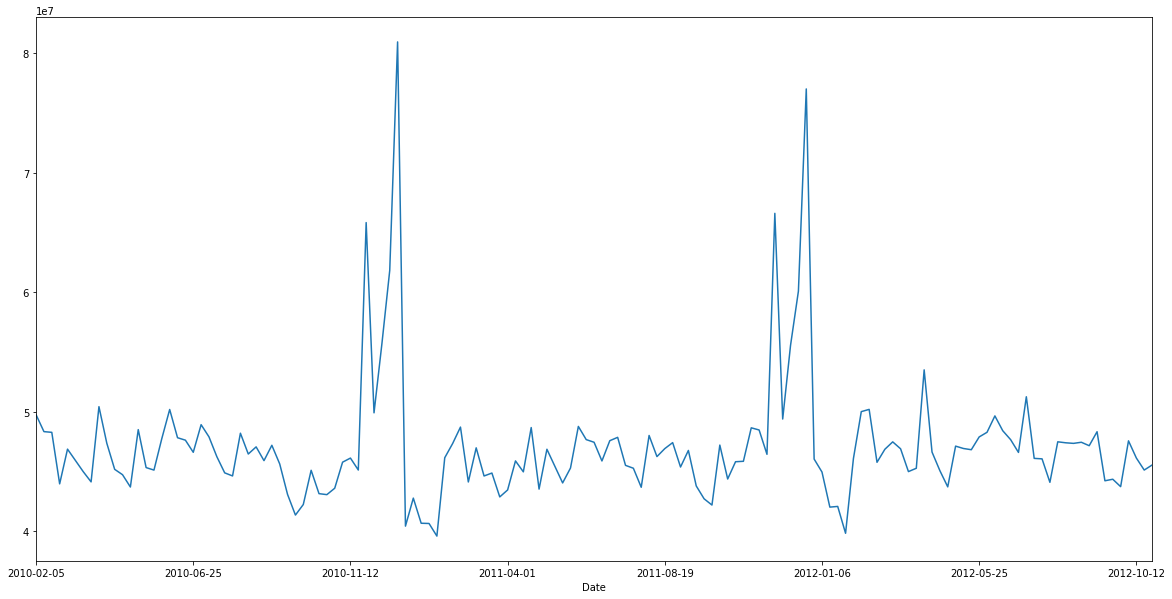

In [0]:
fig, ax = plt.subplots(figsize=(20,10))

df_main2.groupby(['Date']).sum()['Weekly_Sales'].plot(ax=ax)

In [0]:
df_main2.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [0]:
df = df_main2.head(2000)

test part starts

In [0]:
cols = ['Store', 'Dept', 'Weekly_Sales',  'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size']
results = []
for col in cols:
    subdf = df[['Date', col]].dropna()
    subdf.columns = ['ds','y']
    subdf.columns
    m = Prophet()
    m.fit(subdf)
    result = m.predict(m.make_future_dataframe(periods = 90))
    results.append(result)
df.predict = pd.concat(results, axis=1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [0]:
df.predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2010-02-05,7.496011,2.308710,12.453696,7.496011,7.496011,0.002712,0.002712,0.002712,0.002712,0.002712,0.002712,0.0,0.0,0.0,7.498724,2010-02-05,25044.671534,7358.170528,42019.646667,25044.671534,25044.671534,730.354660,730.354660,...,0.068742,0.068742,0.068742,0.068742,0.0,0.0,0.0,211.131332,2010-02-05,8.338627,8.065327,8.167718,8.338627,8.338627,-0.222527,-0.222527,-0.222527,-0.222527,-0.222527,-0.222527,0.0,0.0,0.0,8.116101,2010-02-05,151315.0,151314.999804,151315.000194,151315.000000,151315.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151315.0
1,2010-02-05,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2010-02-05,7.496011,2.407432,12.540898,7.496011,7.496011,0.002712,0.002712,0.002712,0.002712,0.002712,0.002712,0.0,0.0,0.0,7.498724,2010-02-05,25044.671534,8445.760002,43109.600820,25044.671534,25044.671534,730.354660,730.354660,...,0.068742,0.068742,0.068742,0.068742,0.0,0.0,0.0,211.131332,2010-02-05,8.338627,8.065187,8.171716,8.338627,8.338627,-0.222527,-0.222527,-0.222527,-0.222527,-0.222527,-0.222527,0.0,0.0,0.0,8.116101,2010-02-05,151315.0,151314.999821,151315.000203,151315.000000,151315.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151315.0
2,2010-02-05,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2010-02-05,7.496011,2.503931,12.717796,7.496011,7.496011,0.002712,0.002712,0.002712,0.002712,0.002712,0.002712,0.0,0.0,0.0,7.498724,2010-02-05,25044.671534,8319.930040,42773.007937,25044.671534,25044.671534,730.354660,730.354660,...,0.068742,0.068742,0.068742,0.068742,0.0,0.0,0.0,211.131332,2010-02-05,8.338627,8.060896,8.173189,8.338627,8.338627,-0.222527,-0.222527,-0.222527,-0.222527,-0.222527,-0.222527,0.0,0.0,0.0,8.116101,2010-02-05,151315.0,151314.999824,151315.000192,151315.000000,151315.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151315.0
3,2010-02-05,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2010-02-05,7.496011,2.341051,12.615549,7.496011,7.496011,0.002712,0.002712,0.002712,0.002712,0.002712,0.002712,0.0,0.0,0.0,7.498724,2010-02-05,25044.671534,8795.857568,41335.390020,25044.671534,25044.671534,730.354660,730.354660,...,0.068742,0.068742,0.068742,0.068742,0.0,0.0,0.0,211.131332,2010-02-05,8.338627,8.063444,8.167129,8.338627,8.338627,-0.222527,-0.222527,-0.222527,-0.222527,-0.222527,-0.222527,0.0,0.0,0.0,8.116101,2010-02-05,151315.0,151314.999800,151315.000183,151315.000000,151315.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151315.0
4,2010-02-05,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2010-02-05,7.496011,2.394793,12.430798,7.496011,7.496011,0.002712,0.002712,0.002712,0.002712,0.002712,0.002712,0.0,0.0,0.0,7.498724,2010-02-05,25044.671534,8217.692145,43650.196028,25044.671534,25044.671534,730.354660,730.354660,...,0.068742,0.068742,0.068742,0.068742,0.0,0.0,0.0,211.131332,2010-02-05,8.

In [0]:
playoffs = pd.DataFrame({
  'holiday': 'Super Bowl',
  'ds': pd.to_datetime(['2010-02-12', '2011-02-11', '2012-02-10',
                        '2013-02-08']),
  'lower_window': 0,
  'upper_window': 1,
})
laborday = pd.DataFrame({
  'holiday': 'laborday',
  'ds': pd.to_datetime(['2010-09-07', '2011-09-09', '2012-09-07','2013-09-06']),
  'lower_window': 0,
  'upper_window': 1,
})
Thanksgiving = pd.DataFrame({
  'holiday': 'Thanksgiving',
  'ds': pd.to_datetime(['2010-11-26', '2011-11-25', '2012-11-23','2013-11-29']),
  'lower_window': 0,
  'upper_window': 1,
})

Christmas = pd.DataFrame({
  'holiday': 'Christmas',
  'ds': pd.to_datetime(['2010-12-31', '2011-12-30', '2012-12-28','2013-12-27']),
  'lower_window': 0,
  'upper_window': 1,
})


holidays1 = pd.concat((playoffs, laborday))
holidays2 = pd.concat((Thanksgiving,Christmas))
holidays = pd.concat((holidays1,holidays2))


In [0]:
df = df_main2[['Date','Weekly_Sales']]

In [0]:
df.columns = ['ds','y']

In [0]:
df.columns

Index(['ds', 'y'], dtype='object')

In [0]:
df = df.head(50000)

In [0]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
50360,2013-10-22
50361,2013-10-23
50362,2013-10-24
50363,2013-10-25
50364,2013-10-26


In [0]:
holidays

,holiday,ds,lower_window,upper_window
0,Super Bowl,2010-02-12,0,1
1,Super Bowl,2011-02-11,0,1
2,Super Bowl,2012-02-10,0,1
3,Super Bowl,2013-02-08,0,1
0,laborday,2010-09-07,0,1
1,laborday,2011-09-09,0,1
2,laborday,2012-09-07,0,1
3,laborday,2013-09-06,0,1
0,Thanksgiving,2010-11-26,0,1
1,Thanksgiving,2011-11-25,0,1


In [0]:

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
50360,2013-10-22,19200.666137,-14836.387847,56906.131597
50361,2013-10-23,19200.174636,-17932.417124,56521.697251
50362,2013-10-24,19214.654545,-17152.175611,53732.298866
50363,2013-10-25,19245.258230,-17242.736572,56931.630964
50364,2013-10-26,19292.760272,-17534.674425,56154.303094


In [0]:
'''Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13'''


'Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\nLabor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\nThanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\nChristmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13'

In [0]:
m2 = Prophet(holidays=holidays)
forecast2 = m2.fit(df).predict(future)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Super Bowl,Super Bowl_lower,Super Bowl_upper,Thanksgiving,Thanksgiving_lower,Thanksgiving_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,laborday,laborday_lower,laborday_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,18022.710418,-17016.233948,53820.651267,18022.710418,18022.710418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1063.827116,1063.827116,1063.827116,0.0,0.0,0.0,0.0,0.0,0.0,1063.827116,1063.827116,1063.827116,0.0,0.0,0.0,19086.537534
1,2010-02-05,18022.710418,-17581.568514,55485.442378,18022.710418,18022.710418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1063.827116,1063.827116,1063.827116,0.0,0.0,0.0,0.0,0.0,0.0,1063.827116,1063.827116,1063.827116,0.0,0.0,0.0,19086.537534
2,2010-02-05,18022.710418,-14676.151301,55274.198097,18022.710418,18022.710418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1063.827116,1063.827116,1063.827116,0.0,0.0,0.0,0.0,0.0,0.0,1063.827116,1063.827116,1063.827116,0.0,0.0,0.0,19086.537534
3,2010-02-05,18022.710418,-13873.525326,55953.437762,18022.710418,18022.710418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1063.827116,1063.827116,1063.827116,0.0,0.0,0.0,0.0,0.0,0.0,1063.827116,1063.827116,1063.827116,0.0,0.0,0.0,19086.537534
4,2010-02-05,18022.710418,-17558.518263,56997.882302,18022.710418,18022.710418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1063.827116,1063.827116,1063.827116,0.0,0.0,0.0,0.0,0.0,0.0,1063.827116,1063.827116,1063.827116,0.0,0.0,0.0,19086.537534


In [0]:
forecast2[(forecast2['Christmas'] + forecast2['Super Bowl']).abs() > 0][
        ['ds', 'Christmas', 'Super Bowl']][-10:]

,ds,Christmas,Super Bowl
37089,2012-02-10,0.000000,-116.703045
37090,2012-02-10,0.000000,-116.703045
37091,2012-02-10,0.000000,-116.703045
37092,2012-02-10,0.000000,-116.703045
37093,2012-02-10,0.000000,-116.703045
37094,2012-02-10,0.000000,-116.703045
37095,2012-02-10,0.000000,-116.703045
37096,2012-02-10,0.000000,-116.703045
50062,2012-12-28,-7621.248806,0.000000
50104,2013-02-08,0.000000,-116.703045


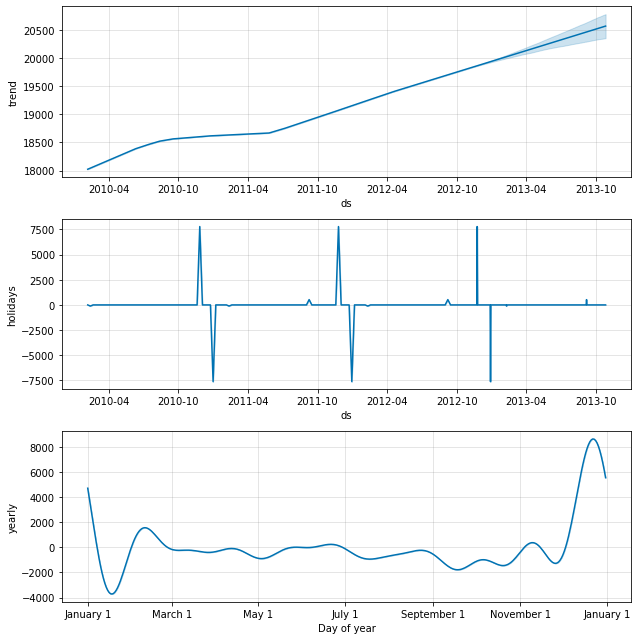

In [0]:
fig = m2.plot_components(forecast2)


In [0]:
forecast2.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas', 'Christmas_lower', 'Christmas_upper', 'Super Bowl',
       'Super Bowl_lower', 'Super Bowl_upper', 'Thanksgiving',
       'Thanksgiving_lower', 'Thanksgiving_upper', 'additive_terms',
       'additive_terms_lower', 'additive_terms_upper', 'holidays',
       'holidays_lower', 'holidays_upper', 'laborday', 'laborday_lower',
       'laborday_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [0]:
forecast2.ds

0       2010-02-05
1       2010-02-05
2       2010-02-05
3       2010-02-05
4       2010-02-05
           ...    
50360   2013-10-22
50361   2013-10-23
50362   2013-10-24
50363   2013-10-25
50364   2013-10-26
Name: ds, Length: 50365, dtype: datetime64[ns]